# Финальный проект

## Анализ датасета о размере мозга

**Оглавление**

1. Теория
2. Односторонний t-тест
3. Двусторонний t-тест
4. Парный t-тест
5. Вывод

### Загрузка необходимых библиотек и данных

In [29]:
# Основные библиотеки

import pandas as pd
import numpy as np

# Тестирование гипотез

from scipy import stats
from statsmodels.formula.api import ols

# Графики

import matplotlib.pyplot as plt

In [2]:
# Путь к файлу

file = 'brain_size.csv'

In [4]:
# Загрузка данных в таблицу

df = pd.read_csv(file, sep = ';', na_values = ".")

In [5]:
# Проверка результата

df.head(10)

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [11]:
# Удаление столбца Unnamed

df = df.drop(['Unnamed: 0'], axis = 1)

---

### Исследование данных

In [12]:
# Размер таблицы

df.shape

(40, 7)

In [27]:
df.describe

<bound method NDFrame.describe of     Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0   Female   133  132  124   118.0    64.5     816932
1     Male   140  150  124     NaN    72.5    1001121
2     Male   139  123  150   143.0    73.3    1038437
3     Male   133  129  128   172.0    68.8     965353
4   Female   137  132  134   147.0    65.0     951545
5   Female    99   90  110   146.0    69.0     928799
6   Female   138  136  131   138.0    64.5     991305
7   Female    92   90   98   175.0    66.0     854258
8     Male    89   93   84   134.0    66.3     904858
9     Male   133  114  147   172.0    68.8     955466
10  Female   132  129  124   118.0    64.5     833868
11    Male   141  150  128   151.0    70.0    1079549
12    Male   135  129  124   155.0    69.0     924059
13  Female   140  120  147   155.0    70.5     856472
14  Female    96  100   90   146.0    66.0     878897
15  Female    83   71   96   135.0    68.0     865363
16  Female   132  132  120   127.0    68.5     8

In [14]:
# Столбцы

df.columns

Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')

**Описание столбцов таблицы:**

- **Gender** - пол
- **FSIQ** - полномасштабный коэффициент интеллекта (когнитивные способности)
- **VIQ** - коэффициент вербального интеллекта
- **PIQ** - коэффициент интеллекта производительности
- **Weight** - вес
- **Height** - рост
- **MRI_Count** - МРТ (магнитные поля и радиоволны)

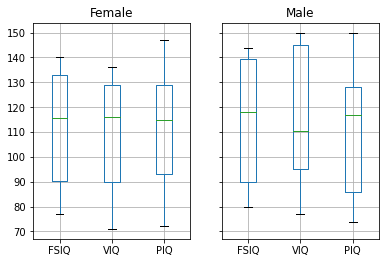

In [22]:
# Распределение FSIQ, VIQ, PIQ в зависимости от пола

gender_group = df.groupby('Gender')

gender_group.boxplot(column = ['FSIQ', 'VIQ', 'PIQ'])
plt.show()

---

### t-Тест Стьюдента

**Односторонний тест**

Если среднее значение по популяции, скорее всего, будет равно заданному значению. Возвращает Т-статистику и р-значение

In [25]:
# Среднее значение по VIQ равно 0?

stats.ttest_1samp(df['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

**Двусторонний тест**

Тестирование на разницу между популяциями

In [26]:
# Выборки

f_viq = df[df['Gender'] == 'Female']['VIQ']
m_viq = df[df['Gender'] == 'Male']['VIQ']

# Тест

stats.ttest_ind(f_viq, m_viq) 

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

**Ошибки**

t-тесты предполагают гауссовские ошибки

In [28]:
stats.wilcoxon(df['FSIQ'], df['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

**Результат:**
Данные не поддерживают гипотезу о том, что представители мужского и женского рода имеют разные VIQ

---

### Статистическая модель OLS

Сравнение между IQ мужчин и женщин используя OLS (линейная модель)

In [30]:
# Загрузка модели данными

model = ols("VIQ ~ Gender + 1", df).fit()

In [31]:
# Проверка результата

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Mon, 19 Apr 2021   Prob (F-statistic):              0.445
Time:                        15:31:58   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

**Интерпретация (значимых) результатов**

- **R-squared** - означает "процентное изменение зависимости, которое объясняется независимыми переменными". Здесь 1,5%. Эта статистика имеет недостаток, она увеличивается с увеличением количества предикторов (зависимых переменных). Следовательно, она становится неубедительной в случае, когда принимается решение о добавлении дополнительной переменной к предсказуемости регрессии.


- **Adj.R-squared** - модифицированная версия R-squared, которая корректируется на количество переменных в регрессии. Она увеличивается только тогда, когда дополнительная переменная добавляется к объяснительной силе регрессии.


- **Prob(F-Statistic)** - говорит об общей значимости регрессии. Это позволяет оценить уровень значимости всех переменных вместе, в отличие от t-статистики, измеряющей его для отдельных переменных. Нулевой гипотезой при этом является "все коэффициенты регрессии равны нулю". Prob(F-Statistic) отображает вероятность того, что нулевая гипотеза верна, в этом случае 44.5%.


- **AIC / BIC** - AIC расшифровывается как "Информационные критерии Акайке" и используется для подбора моделей. Он наказывает режим "Ошибки" в случае добавления новой переменной в уравнение регрессии. Вычисляется как количество параметров минус вероятность общей модели. Нижняя AIC подразумевает более качественную модель. В то время как BIC означает Байесовские информационные критерии и является вариантом AIC, в котором штрафные санкции делаются более строгими.


- **Prob(Omnibus)** - одно из предположений OLS заключается в том, что ошибки распределены нормально. Для проверки этого выполняется многопрофильный тест. Здесь нулевая гипотеза заключается в том, что ошибки распределены нормально. Предполагается, что Prob(Омнибус) должен быть близок к 1, чтобы он удовлетворял предположению OLS. В этом случае Prob(Omnibus) равен 0.000, что означает, что предположение OLS не удовлетворяет. В связи с этим оцененные из него коэффициенты не являются лучшими линейными несмещенными оценщиками (BLUE).


- **Durbin-watson** - означает, что дисперсия ошибок постоянна. Предпочтительно значение от 1 до 2. Здесь ~1.7 означает, что результаты регрессии достоверны с интерпретационной стороны данной метрики.


- **Prob(Jarque-Bera)** - соответствует тесту Omnibus. Он также выполняется для анализа распределения ошибок регрессии. Предполагается, что он согласуется с результатами теста Omnibus. Большое значение теста JB указывает на то, что ошибки распределены не нормально.

---